In [9]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
 

import pycaret.regression as reg

In [2]:
from utils.timeseries_helpers import (
    extend_single_timeseries_frame,
    make_timeseries_features,
    forecast_single_timeseries
)

# DATA IMPORT ----

walmart_sales_raw_df = pd.read_csv("data/walmart_sales.csv")


unique_ids = walmart_sales_raw_df['item_id'].unique()
walmart_sales_raw_df.tail(3)



,item_id,value,date
22953,FOODS_3_635,0,2016-04-22
22954,FOODS_3_635,0,2016-04-23
22955,FOODS_3_635,0,2016-04-24


In [3]:
# 1.0 THE FORECASTING PROCESS ----

# EXTEND THE DATA --- 

# Select a single id
id = unique_ids[1]

# Extend a signle timeseries
single_timeseries_extended_df = extend_single_timeseries_frame(
    data = walmart_sales_raw_df,
    id   = id,
    h    = 60
)
single_timeseries_extended_df

# Visualize the extended timeseries
px.line(
    single_timeseries_extended_df,
    y          = 'value',
    line_group = 'item_id',
    color      = 'key',
)

In [12]:
single_timeseries_extended_df

,item_id,value,key
2011-01-29,FOODS_3_586,516.0,ACTUAL
2011-01-30,FOODS_3_586,479.0,ACTUAL
2011-01-31,FOODS_3_586,328.0,ACTUAL
2011-02-01,FOODS_3_586,376.0,ACTUAL
2011-02-02,FOODS_3_586,319.0,ACTUAL
...,...,...,...
2016-06-19,FOODS_3_586,NaN,FUTURE
2016-06-20,FOODS_3_586,NaN,FUTURE
2016-06-21,FOODS_3_586,NaN,FUTURE
2016-06-22,FOODS_3_586,NaN,FUTURE


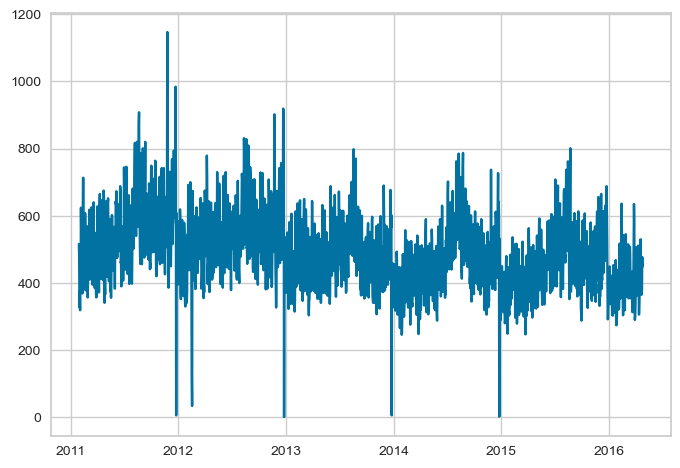

In [21]:
filtered_df = single_timeseries_extended_df[single_timeseries_extended_df["value"].notna() & (single_timeseries_extended_df["value"] > 0)]
plt.plot(filtered_df.index, filtered_df["value"])

In [19]:
single_timeseries_extended_df[single_timeseries_extended_df["value"] > 0]

,item_id,value,key
2011-01-29,FOODS_3_586,516.0,ACTUAL
2011-01-30,FOODS_3_586,479.0,ACTUAL
2011-01-31,FOODS_3_586,328.0,ACTUAL
2011-02-01,FOODS_3_586,376.0,ACTUAL
2011-02-02,FOODS_3_586,319.0,ACTUAL
...,...,...,...
2016-04-20,FOODS_3_586,373.0,ACTUAL
2016-04-21,FOODS_3_586,365.0,ACTUAL
2016-04-22,FOODS_3_586,381.0,ACTUAL
2016-04-23,FOODS_3_586,477.0,ACTUAL
